# AMS 561 Homework 5

First, we will need to import the following libraries:

In [294]:
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1  Warmup
**1(a)** Create a pandas Series object with values given by the first 10 positive even integers (2, 4, ..., 20) and with indices given by the first 10 letters of English alphabet.  Display the result.

In [295]:
values=pd.Series(np.arange(2,21,2),index=list('abcdefghij'))
print(values)

a     2
b     4
c     6
d     8
e    10
f    12
g    14
h    16
i    18
j    20
dtype: int32


**1(b)** 1) Create a pandas DataFrame object that represents the data from the table below:

|Rank|Name| NetWorth_Mill | Age |
|--|-------------------------------|
|1 |Steven Spielberg  |3700 | 71 |
|2 |Oprah Winfrey  |3200 | 64 |
|3 |Paul McCartney |1200 | 75 |
|4 |J.K. Rowling  |1000 | 62 |
|5 |Jay-Z  |900 | 48 |

(data from [source](https://list25.com/25-richest-celebrities-with-the-highest-net-worth/)). Use "Rank" as the indices. Display your result.

In [296]:
worth=pd.DataFrame([[1,'Steven Spielberg',3700,71],[2, 'Oprah Winfrey',3200,64],\
                     [3, 'Paul McCartney', 1200,75], [4,'J.K Rowling', 1000, 62], [5, 'Jay-Z', 900,48]],\
                    columns=['Rank', 'Name','NetWorth_Mill', 'Age'])

In [297]:
worth=worth.set_index('Rank')

In [298]:
worth.head()

,Name,NetWorth_Mill,Age
Rank,,,
1,Steven Spielberg,3700,71
2,Oprah Winfrey,3200,64
3,Paul McCartney,1200,75
4,J.K Rowling,1000,62
5,Jay-Z,900,48


2) There is actually a typo in J.K.Rowling's age. It should be 52 instead of 62. Make this correction in your DataFrame. Display the result.

In [299]:
worth.loc[4,'Age']= 52
worth

,Name,NetWorth_Mill,Age
Rank,,,
1,Steven Spielberg,3700,71
2,Oprah Winfrey,3200,64
3,Paul McCartney,1200,75
4,J.K Rowling,1000,52
5,Jay-Z,900,48


3) Display only the 'NetWorth_Mill' column.

In [300]:
worth['NetWorth_Mill']

Rank
1    3700
2    3200
3    1200
4    1000
5     900
Name: NetWorth_Mill, dtype: int64

4) Compute the average age, mininum age, and maximum age of these top 5 peopole.

In [301]:
worth['Age'].mean()

62.0

In [302]:
worth['Age'].min()

48

In [303]:
worth['Age'].max()

75

5) Sort the 'Age' column in descending order. 

In [304]:
worth.sort_values(['Age'],ascending=False).head()

,Name,NetWorth_Mill,Age
Rank,,,
3,Paul McCartney,1200,75
1,Steven Spielberg,3700,71
2,Oprah Winfrey,3200,64
4,J.K Rowling,1000,52
5,Jay-Z,900,48


## Problem 2 : more on Pandas
1) Download the file ""BoxOffice2017.csv" to your current directory and use `read_csv` function in Pandas to read this csv file and create a DataFrame named "df_box"

In [305]:
df_box=pd.read_csv('BoxOffice2017(1).csv')


2) Use `info` method to get the summary of our DataFrame. How many columns are there?  How many rows of data? (Answer these questions in a Markdown cell.)

In [306]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Rank                      20 non-null int64
Movie_Title               20 non-null object
Studio                    20 non-null object
Total Gross / Theaters    20 non-null object
Unnamed: 4                20 non-null object
Opening / Theaters        20 non-null object
Unnamed: 6                20 non-null object
Open                      20 non-null object
Close                     20 non-null object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB


There are 20 rows and 9 columns

3) Display the first 5 rows of the data

In [307]:
df_box.head()

,Rank,Movie_Title,Studio,Total Gross / Theaters,Unnamed: 4,Opening / Theaters,Unnamed: 6,Open,Close
0,1,Star Wars: The Last Jedi,BV,"$620,013,653","4,232","$220,009,584","4,232",12/15/18,-
1,2,Beauty and the Beast (2017),BV,"$504,014,165","4,210","$174,750,616","4,210",3/17/18,7/13
2,3,Wonder Woman,WB,"$412,563,408","4,165","$103,251,471","4,165",6/2/18,11/9
3,4,Jumanji: Welcome to the Jungle,Sony,"$402,003,308","3,849","$36,169,328","3,765",12/20/18,-
4,5,Guardians of the Galaxy Vol. 2,BV,"$389,813,101","4,347","$146,510,104","4,347",5/5/18,9/21


4) It probably makes more sense if we use the "Rank" column as an index. Do this. 

In [308]:
df_box=df_box.set_index('Rank')

5) Let's raname some columns so that we can access them as attributes in Python.
- Rename the column "Total Gross / Theaters" to "Total_Gross"
- Raname the column "Unnamed: 4" (it's the column to the right of ""Total Gross / Theaters") to "Theaters_Total"
- Raname the column "Opening / Theaters" to "Opening"
- Raname the column "Unnamed: 6" to "Theaters_Opening"
- Display the first 5 rows to show the result. 

In [309]:
df_box=df_box.rename(columns={'Total Gross / Theaters':'Total_Gross', 'Unnamed: 4': 'Theaters_Total', 'Opening / Theaters': 'Opening', 'Unnamed: 6': 'Theaters_Opening'})

df_box.head()
                    

,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening,Open,Close
Rank,,,,,,,,
1,Star Wars: The Last Jedi,BV,"$620,013,653","4,232","$220,009,584","4,232",12/15/18,-
2,Beauty and the Beast (2017),BV,"$504,014,165","4,210","$174,750,616","4,210",3/17/18,7/13
3,Wonder Woman,WB,"$412,563,408","4,165","$103,251,471","4,165",6/2/18,11/9
4,Jumanji: Welcome to the Jungle,Sony,"$402,003,308","3,849","$36,169,328","3,765",12/20/18,-
5,Guardians of the Galaxy Vol. 2,BV,"$389,813,101","4,347","$146,510,104","4,347",5/5/18,9/21


6) Delete the columns "Open" and "Close" so that we have a cleaner data. 

In [310]:
df_box=df_box.drop(['Open','Close'],axis=1)

7) The columns that contain "numbers" are not of numerical type. We will convert them to integers. 
- In the "Total_Gross" and "Opening", remove the "$" and "," and casts the results to integers. Replace the original columns with the transformed columns.
- In the "Theaters_Total" and "Theaters_Opening", remove the "," and casts the results to integers
- Display the result with `df_box.head()`
- Check the types of columns by using `df_box.info()` . (now you should  those columns are now of `int64`(integer) type) 

In [311]:
df_box['Total_Gross']=df_box['Total_Gross'].apply(lambda x:(x.replace('$','')))

In [312]:
df_box['Total_Gross']=df_box['Total_Gross'].apply(lambda x:int(x.replace(',','')))

In [313]:
df_box['Opening']=df_box['Opening'].apply(lambda x:(x.replace('$','')))

In [314]:
df_box['Opening']=df_box['Opening'].apply(lambda x:int(x.replace(',','')))

In [315]:
df_box['Theaters_Total']=df_box['Theaters_Total'].apply(lambda x:int(x.replace(',','')))

In [316]:
df_box['Theaters_Opening']=df_box['Theaters_Opening'].apply(lambda x:int(x.replace(',','')))

In [317]:
df_box.head()

,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening
Rank,,,,,,
1,Star Wars: The Last Jedi,BV,620013653,4232,220009584,4232
2,Beauty and the Beast (2017),BV,504014165,4210,174750616,4210
3,Wonder Woman,WB,412563408,4165,103251471,4165
4,Jumanji: Welcome to the Jungle,Sony,402003308,3849,36169328,3765
5,Guardians of the Galaxy Vol. 2,BV,389813101,4347,146510104,4347


In [318]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 6 columns):
Movie_Title         20 non-null object
Studio              20 non-null object
Total_Gross         20 non-null int64
Theaters_Total      20 non-null int64
Opening             20 non-null int64
Theaters_Opening    20 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


8) Now we are ready to compute some statistics (of these top 20 movies). Write a code to answer the following questions:
- What is the standard deviation of the total gross?
- What is the mininum of "Theaters_Total"?
- What is the maximum of "Theaters_Opening"?
- What is the 80 percentile (0.8 quantile) of "Opening"?

In [319]:
df_box['Total_Gross'].std()

127118287.10773635

In [320]:
df_box['Theaters_Total'].min()

3143

In [321]:
df_box['Theaters_Opening'].max()

4529

In [322]:
df_box['Opening'].quantile(q=0.8)

122876675.0

9) Write a code to find how many movies(in the top20) each studio made. (e.g. BV (Buenva Vista) produced 6 movies that were in the top20), ...)

In [323]:
df_box.pivot_table(index='Studio',values='Movie_Title',aggfunc='count')

,Movie_Title
Studio,
BV,6
Fox,3
Sony,2
Uni.,3
WB,5
WB (NL),1


10) How much money (from Total_Gross) did each studio earn from all of their movies in the top20? (Note: to make it easy, you don't need to combine "WB" and "WB(NL)"). 

In [324]:
studio_gross=df_box.pivot_table(index='Studio',values='Total_Gross',aggfunc='sum')

In [325]:
studio_gross

,Total_Gross
Studio,
BV,2210865327
Fox,572551762
Sony,736204448
Uni.,666673350
WB,1173436445
WB (NL),327481748


11) Sort the "Opening" column in descending order (i.e., highest opening first) and display the data of the top 5 "Opening".  What movie has the third-highest opening?

In [326]:
box_opening=df_box.sort_values("Opening",ascending=False)

In [327]:
box_opening.head()

,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening
Rank,,,,,,
1,Star Wars: The Last Jedi,BV,620013653,4232,220009584,4232
2,Beauty and the Beast (2017),BV,504014165,4210,174750616,4210
5,Guardians of the Galaxy Vol. 2,BV,389813101,4347,146510104,4347
7,It,WB (NL),327481748,4148,123403419,4103
8,Thor: Ragnarok,BV,315058289,4080,122744989,4080


In [328]:
box_opening.iloc[2,df_box.columns.get_loc('Movie_Title')]

'Guardians of the Galaxy Vol. 2'

12) Use the built-in pandas plotting tools (e.g. `plot` method) to make 2 bargraphs for 
1. The top 10 highest-grossing movies with the names of the movies on the y-axis and the total gross on the x-axis.
2. The studio names on the y-axis and the total money (from Total_Gross) they earn from their movies in the top20 on the x-axis. 

Don't forget to label the axes.
Hint: For each plot, you can create a new DataFrame which contains only the data you want and then apply `plot` method.

In [329]:
top10=df_box.sort_values('Total_Gross',ascending=False)[0:10]

In [330]:
top10=top10.drop(['Studio','Theaters_Total','Opening','Theaters_Opening'],axis=1)

In [331]:
top10=top10.set_index('Movie_Title')

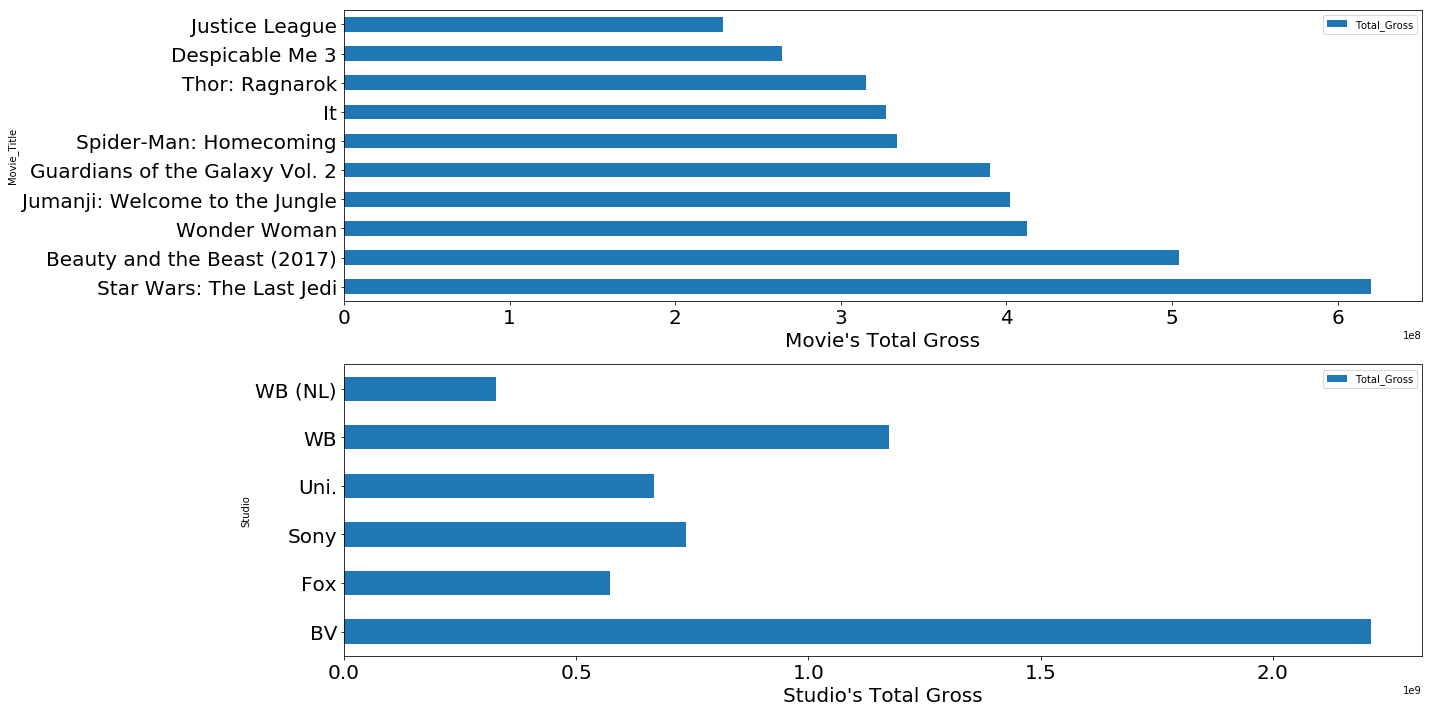

In [332]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=[20,10])
top10.plot(kind='barh',ax=ax1,fontsize=20)
ax1.set_xlabel('Movie\'s Total Gross', fontsize=20)
studio_gross.plot(kind='barh', ax=ax2, fontsize=20)
ax2.set_xlabel('Studio\'s Total Gross', fontsize=20)
plt.tight_layout()

## Problem 3 : Linear Regression

Download the file "data_linear_regression_hw5.csv" and create a DataFrame from this data

In [333]:
data=pd.read_csv("data_linear_regression_hw5(1).csv")

In [334]:
data.head()

,x1,x2,x3,y
0,0.148227,0.446577,-1.009014,4.138490
1,0.353487,-0.648183,0.796402,2.980097
2,-1.087250,-0.622992,-0.667353,3.507599
3,0.247096,1.072407,1.910038,17.975063
4,-0.156840,-0.557375,1.317638,2.496506


Using the method `head` or `info` you will see that there are 4 columns.   `x1`, `x2`, `x3` are input(independent) variables and `y` is the response(dependent) variable. We will perform ordinary linear regression on this data based on two guesses.

**1st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$
Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using `summary` method.

In [335]:
model=smf.ols('y~x1+x2+x3',data)

In [336]:
results=model.fit()

In [337]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.766
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           0.000105
Time:                        16:07:24   Log-Likelihood:                -170.25
No. Observations:                  50   AIC:                             348.5
Df Residuals:                      46   BIC:                             356.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9764      1.081      3.680      0.0

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, \beta_2, \beta_3 $ (in our model: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$)?
-  What is the R-squared of our first model? Do you think this model fits the data very well?  Why?


[your answer here]: β0 = 3.9764, β1= -0.0676, β2= 6.0327, β4= 2.7438, R-Squared = 0.364. I don't think that this model fits our data well. I say this because the R-Squared vaue is far from 1. 

Let's try to include all interaction terms of the input variables $x_1, x_2, x_3$.

**2st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 
+ \beta_5 x_1 x_3 + \beta_6 x_2 x_3 $

- Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using `summary` method.

In [338]:
models=smf.ols('y~x1+x2+x3+x1*x2+x1*x3+x2*x3', data)

In [339]:
results=models.fit()

In [340]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2590.
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           2.50e-53
Time:                        16:07:28   Log-Likelihood:                -34.241
No. Observations:                  50   AIC:                             82.48
Df Residuals:                      43   BIC:                             95.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9590      0.075     53.017      0.0

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, ..., \beta_6 $ in this model?
-  What is the R-squared of our second model? Do you think this model fits the data very well?  Why?

##### [your answer here]: β0= 3.9590, β1= 3.1222, β2= 4.9514, β3= 2.0158, β4 = 3.9754, β5=6.0570, β6 = -0.0775. The R-Squared value of this model is 0.997. I think this model fits this data well because the R-Squared value is close to 1. 